<a href="https://colab.research.google.com/github/rushiraj-gohil/Time-Series-Analysis/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import mean_squared_error

In [2]:
pip install yfinance

     |████████████████████████████████| 6.3MB 32.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=8e6c9be841777cbc60e877db264de7647a76a2e66ba869ece0190e16e5cb34c2
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 29.5MB/s 
     |████████████████████████████████| 9.5MB 33.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
import yfinance as yf
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
import datetime
%matplotlib inline

In [6]:
yf.pdr_override()

In [7]:
syms = ['TATAPOWER.NS']

In [27]:
start = str(datetime.date.today() + relativedelta(years=-5))
tatap = pdr.get_data_yahoo(syms, start = start)
tatap.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-12,74.050003,74.300003,71.099998,72.699997,61.194031,6293320
2016-07-13,72.800003,73.250000,71.900002,72.050003,60.646889,3796673
2016-07-14,71.800003,72.000000,71.150002,71.800003,60.436466,3847226
2016-07-15,72.550003,72.550003,71.199997,71.650002,60.310204,4554188
2016-07-18,71.699997,71.900002,70.050003,70.349998,59.215950,2888146


In [28]:
tatap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-12,74.050003,74.300003,71.099998,72.699997,61.194031,6293320
2016-07-13,72.800003,73.250000,71.900002,72.050003,60.646889,3796673
2016-07-14,71.800003,72.000000,71.150002,71.800003,60.436466,3847226
2016-07-15,72.550003,72.550003,71.199997,71.650002,60.310204,4554188
2016-07-18,71.699997,71.900002,70.050003,70.349998,59.215950,2888146


In [29]:
tatap.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [30]:
tatap = tatap.dropna() 
# droping the NA values

In [31]:
tatap.isna().sum()
# checking if there are any NAs

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
tatap.index = tatap.index.astype('datetime64[ns]')  
# converting the datatype of Date into datetime

In [14]:
from statsmodels.tsa.arima_model import ARIMA 
# for prediction of stock prices by training the data

In [33]:
tatap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-12,74.050003,74.300003,71.099998,72.699997,61.194031,6293320
2016-07-13,72.800003,73.250000,71.900002,72.050003,60.646889,3796673
2016-07-14,71.800003,72.000000,71.150002,71.800003,60.436466,3847226
2016-07-15,72.550003,72.550003,71.199997,71.650002,60.310204,4554188
2016-07-18,71.699997,71.900002,70.050003,70.349998,59.215950,2888146


In [34]:
tatap["2019-12"].Close.mean()    # finding mean

54.98571414039249

In [35]:
tatap["2019-12-01":"2019-12-07"]       # data in a given range

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,57.349998,57.400002,55.549999,56.349998,53.919018,12052254
2019-12-03,56.500000,56.500000,55.000000,55.450001,53.057842,5536309
2019-12-04,55.000000,56.150002,54.900002,55.849998,53.440586,3605231
2019-12-05,56.150002,56.150002,55.250000,55.799999,53.392742,7119298
2019-12-06,57.349998,57.349998,53.200001,53.500000,51.191967,14587403


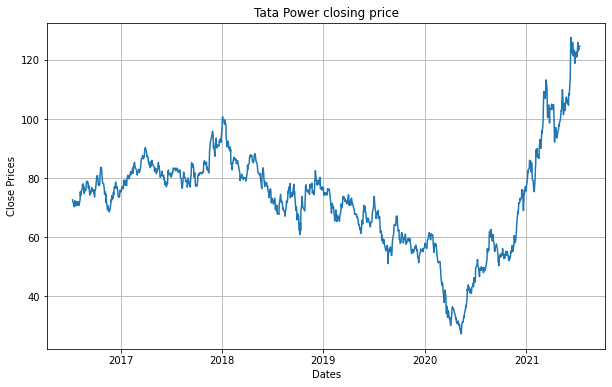

In [37]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(tatap['Close'])
plt.title('Tata Power closing price')
plt.show()

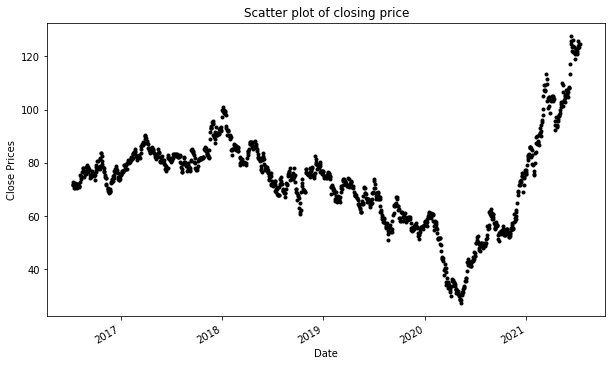

In [40]:
tatap_close = tatap['Close']
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
tatap_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

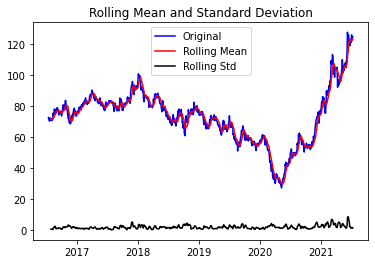

Results of dickey fuller test
Test Statistics                  -0.128899
p-value                           0.946483
No. of lags used                 14.000000
Number of observations used    1218.000000
critical value (1%)              -3.435730
critical value (5%)              -2.863916
critical value (10%)             -2.568035
dtype: float64


In [41]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(tatap_close)

To accept the null hypothesis the Test Statistics Value should be greater than the Critical Values. So here in this particular case we are accepting the null hypothesis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

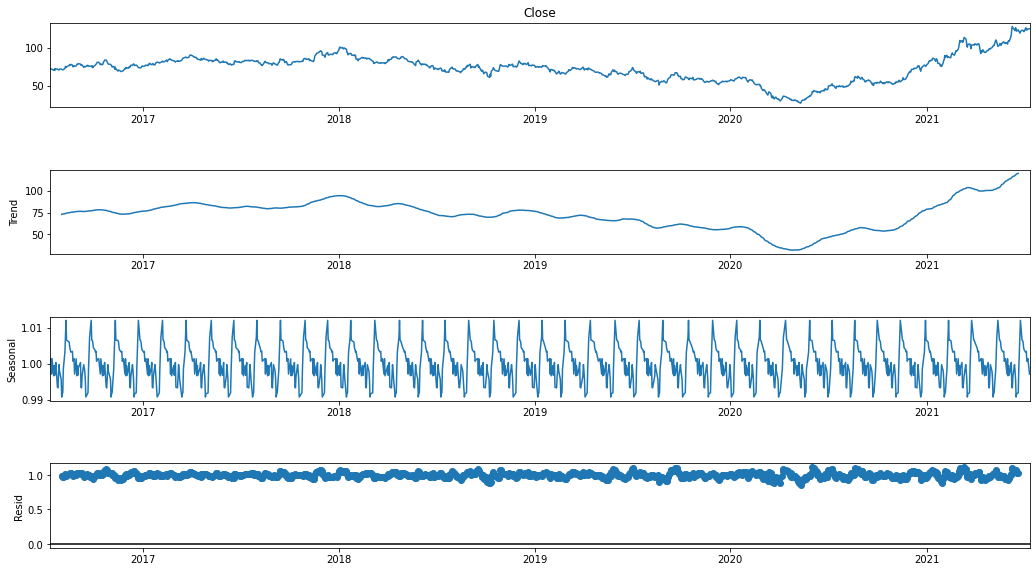

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tatap_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

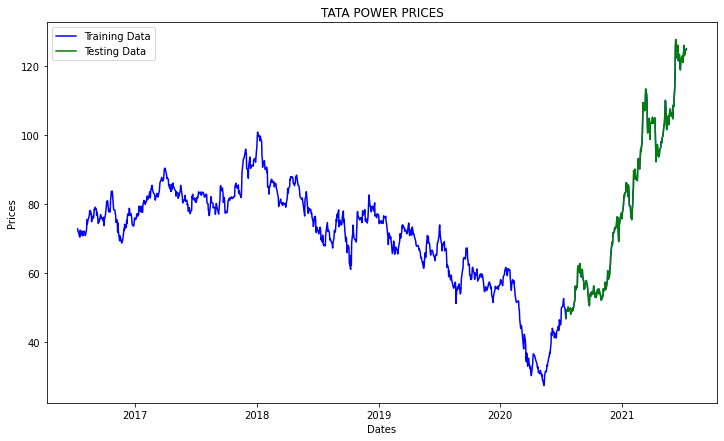

In [47]:
train_data, test_data = tatap[0:int(len(yesd)*0.8)], tatap[int(len(yesd)*0.8):]
plt.figure(figsize=(12,7))
plt.title('TATA POWER PRICES')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(yesd['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')

plt.legend()


In [45]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))


In [46]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Conv

Testing Mean Squared Error: 4.833
Symmetric mean absolute percentage error: 34.287


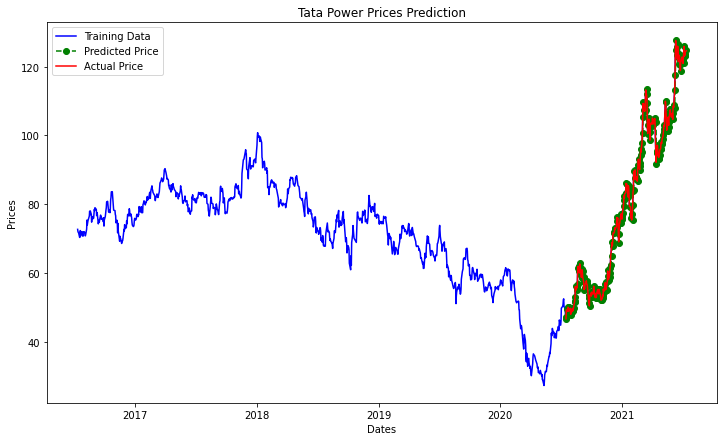

In [48]:
plt.figure(figsize=(12,7))
plt.plot(tatap['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tata Power Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()


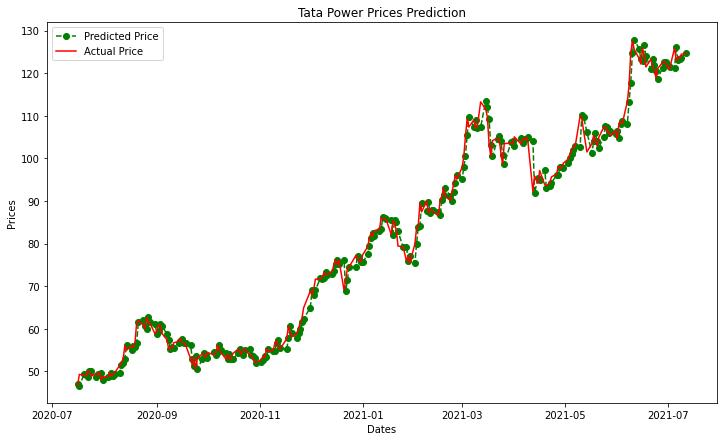

In [49]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.legend()
plt.title('Tata Power Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()